# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# Integrantes

* Juan Sebastian Rincón H. - 201214767
* Angie Paola Chacón - 201012536
* Alexander Camargo - 200911325
* Juan Fernando Ortiz - 200623117

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [43]:
df = pd.read_csv(r'C:/Users/ap.chacon511/OneDrive - Universidad de los andes/Maestría Analytics/2020-19/Tareas/data_arma.csv', index_col=0)

In [44]:
df.head()

,ts1,ts2,ts3,ts4
0,0.533570,-0.126804,-0.802837,1.812825
1,1.240130,1.314360,-0.595602,0.042764
2,1.618598,1.405994,0.127180,-1.759427
3,1.140465,3.132621,0.958586,-0.456798
4,0.481561,3.179083,0.164598,-1.254790


# Gráficos TS1

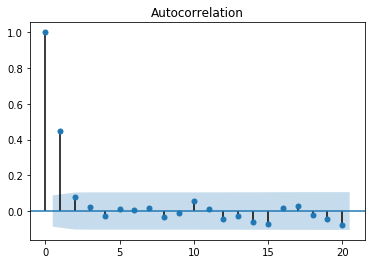

In [45]:
plot_acf(df['ts1'], lags=20);

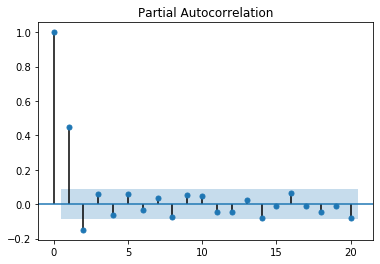

In [46]:
plot_pacf(df['ts1'], lags=20);

# Gráficos TS2

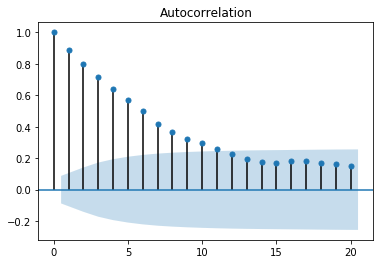

In [47]:
plot_acf(df['ts2'], lags=20);

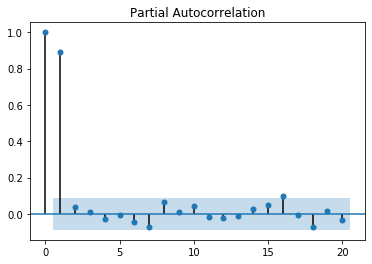

In [48]:
plot_pacf(df['ts2'], lags=20);

# Gráficos TS3

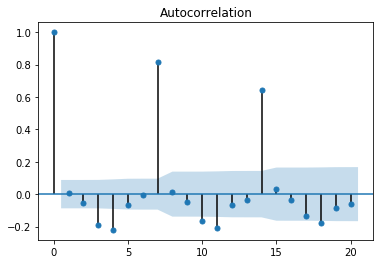

In [49]:
plot_acf(df['ts3'], lags=20);

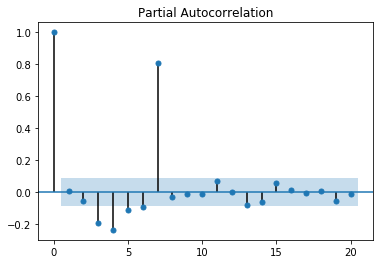

In [50]:
plot_pacf(df['ts3'], lags=20);

# Gráficos TS4

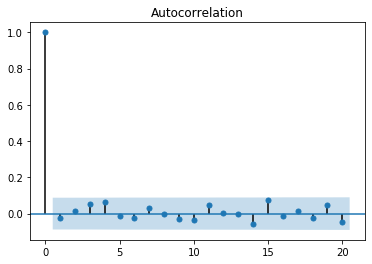

In [51]:
plot_acf(df['ts4'], lags=20);

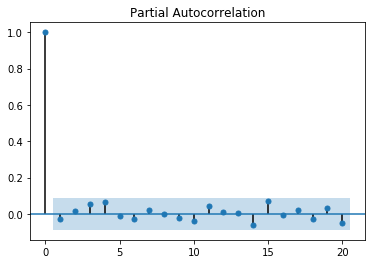

In [52]:
plot_pacf(df['ts4'], lags=20);

# Conclusiones

* TS1: Se comporta como un modelo MA(1)
* TS2: Se comporta como un modelo AR(1)
* TS3: Se comporta como un modelo AR(7)
* TS4: Se comporta como una caminata aleatoria

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the mse of the rolling forecast


In [53]:
df = pd.read_csv(r'C:/Users/ap.chacon511/OneDrive - Universidad de los andes/Maestría Analytics/2020-19/Contenido clase/AdvancedMethodsDataAnalysisClass-master/datasets/shampoo.csv', index_col=0)

In [54]:
df.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


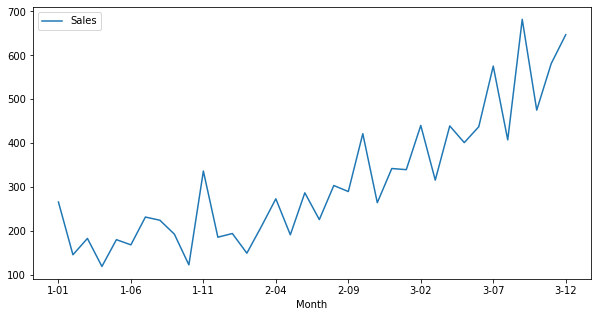

In [55]:
df.plot(figsize=(10, 5));

In [56]:
from statsmodels.tsa.stattools import adfuller

## Prueba de Dickey-Fuller

In [57]:
d_f = adfuller(df)
print('ADF Statistic: %f' % d_f[0])
print('p-value: %f' % d_f[1])

ADF Statistic: 3.060142
p-value: 1.000000


In [58]:
d_f = adfuller(df.diff().iloc[1:])
print('ADF Statistic: %f' % d_f[0])
print('p-value: %f' % d_f[1])

ADF Statistic: -7.249074
p-value: 0.000000


## Conclusiones
Con los resultados de la prueba de Dickey-Fuller, se puede concluir que al aplicarle una diferencia de ordén 1 a la serie de ventas de shampoo esta se vuelve una estacionara. Lo anterior, dado que a un nivel de confianza del 95%, no hay evidencia estadística suficiente para rechazar Ho. 

## Gráficas de Autocorrelación y Autocorrelaciones Parciales

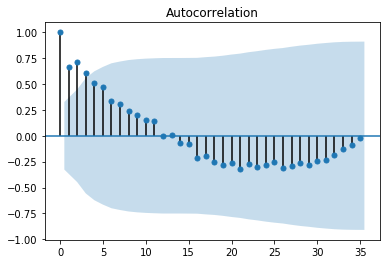

In [59]:
plot_acf(df, lags=35);

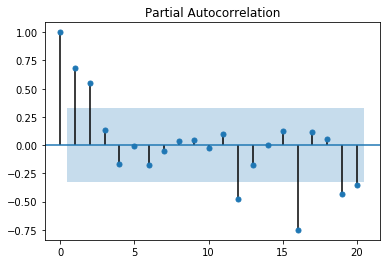

In [60]:
plot_pacf(df, lags=20);

## Encontrar parámetros óptimos del p,d y q que minicen el MSE

In [71]:
p = np.arange(1, 8, 1)
q = np.arange(1, 2, 1)

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
errors = list()

for ml in range(len(q)):
    for m in range(len(p)):
        for t in range(len(test)):
            model = ARIMA(history, order=(m,1,l))
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)
    #         print('predicted=%f, expected=%f' % (yhat, obs))
        error = mean_squared_error(test, predictions) ** 0.5
        print(m,1,l,error)
        errors.append(error)
        predictions = list()
        history = [x for x in train]

0 1 0 134.17590331338326
1 1 0 84.38822029565345
2 1 0 75.43161348791043
3 1 0 83.65966948471767
4 1 0 81.54504122389166
5 1 0 83.41658004303335
6 1 0 82.52315300492675


## Conclusiones
Los parametros que optimizan el MSE son p= 2, d=1 y q=0, con un MSE de 75,43

## Modelo ARIMA (2,1,0)

In [37]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(df, order=(1,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\ap.chacon511\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   36
Model:                     ARMA(1, 2)   Log Likelihood                -203.044
Method:                       css-mle   S.D. of innovations             60.642
Date:                Mon, 22 Jun 2020   AIC                            416.089
Time:                        15:15:05   BIC                            424.006
Sample:                             0   HQIC                           418.852
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         374.9046    135.150      2.774      0.006     110.016     639.794
ar.L1.Sales     0.9676      0.034     28.687      0.000       0.901       1.034
ma.L1.Sales    -1.2999      0.118    -11.032    

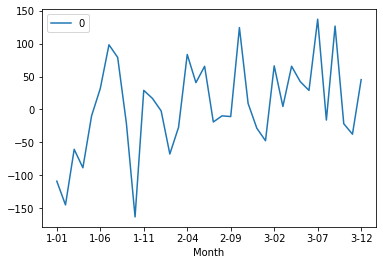

In [38]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

**Prueba de normalidad de errores**

In [39]:
from scipy import stats
stats.normaltest(residuals)

NormaltestResult(statistic=array([0.79121791]), pvalue=array([0.67326992]))

### Conclusión
Ho: La variable se distribuye normal

Ha: La variable no se distribuye normal

De acuerdo con los resultados de la prueba D’Agostino and Pearson’s, a un nivel de significancia del 95% se rechaza la Ho, y por lo tanto se puede concluir que los errores los errores de la serie de ventas de shampoo no se distribuyen normal. Adicionalmente, se observa que la media de los errores en la gráfica es diferente de 0 y su desviación estandar es diferente de 1, por lo tanto los datos no se comportan como ruido blanco.

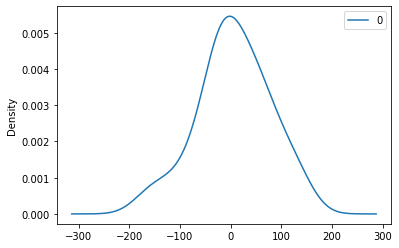

                0
count   36.000000
mean     5.842856
std     70.946655
min   -163.238318
25%    -27.475464
50%      1.187019
75%     50.378732
max    137.044288


In [40]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())